In [1]:
import face_recognition
#画像を取得する
image = face_recognition.load_image_file("../Messi.jpg")
#顔の位置を取得する
face_locations = face_recognition.face_locations(image)
#目、鼻、口、顎の位置と形を取得する
face_landmarks_list = face_recognition.face_landmarks(image)

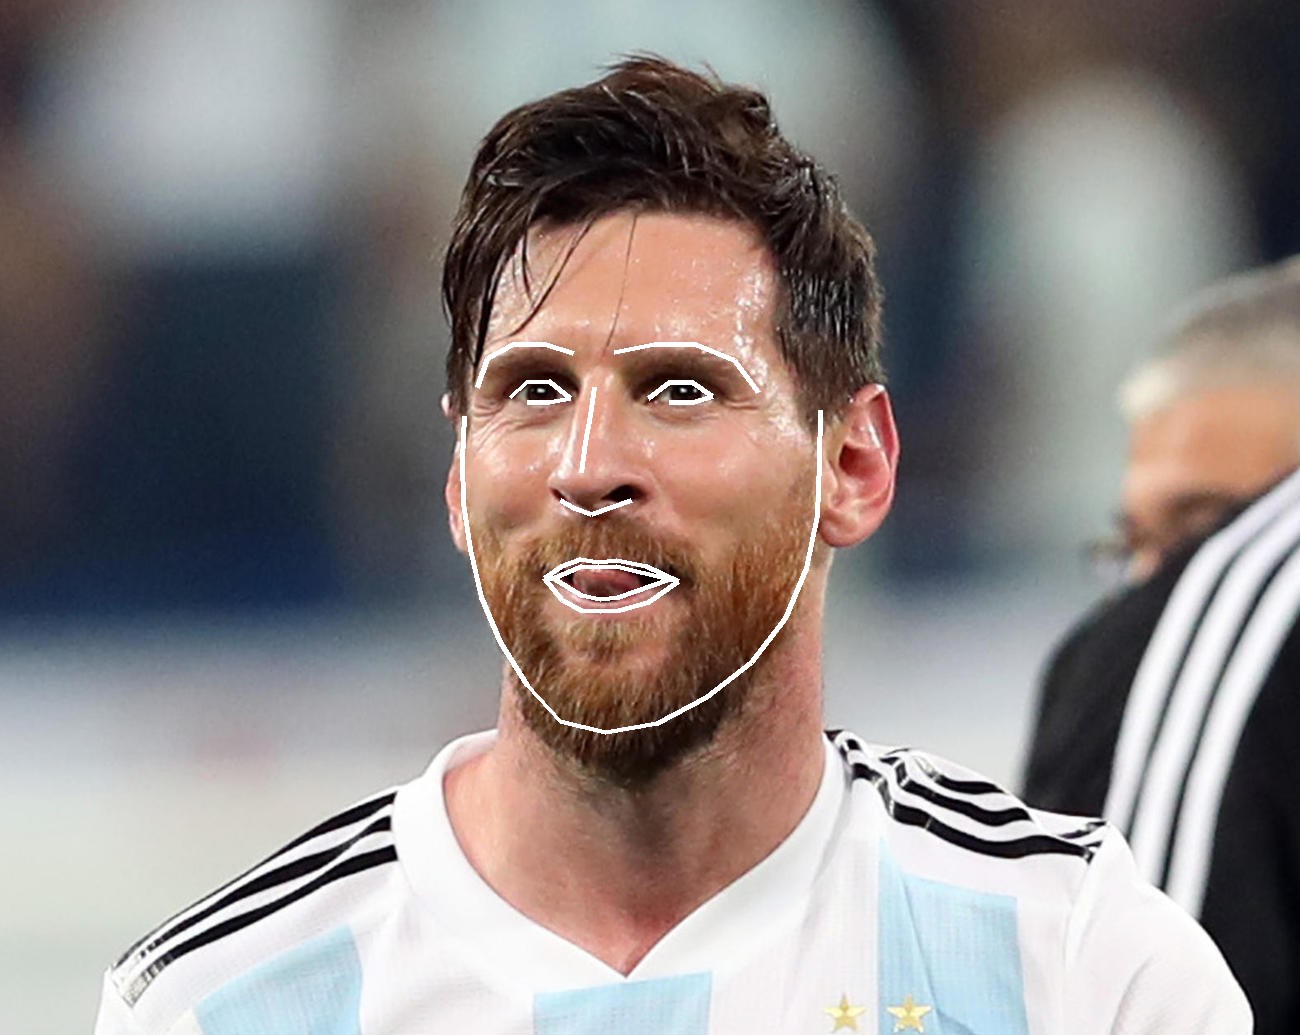

In [4]:
#画像に取得した目、鼻、口、顎を線で描く
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)
for face_landmarks in face_landmarks_list:
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)
pil_image.show()